In [3]:
import video.vid as v
import pandas as pd
from video import df
import numpy as np
from importlib import reload
from cv2 import inRange
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

In [4]:
path = 'videos/Red Spin.mp4'
vid = v.Video.from_file(path)
vid_df = df.get_vid_df(path)
cdf = df.get_exploration_df(path)
agg_df = df.get_aggregated_df(cdf)

In [3]:
agg_df.head()

,lightness,hue,saturation,masked_values,light_diff,hue_diff,saturation_diff,mask_diff
frame,,,,,,,,
0,32.58,0.03,65.76,0,NaN,NaN,NaN,NaN
1,31.60,0.13,66.09,0,0.98,-0.10,-0.33,0.00
2,30.97,0.01,64.15,0,0.63,0.13,1.94,0.00
3,32.02,0.02,65.12,0,-1.05,-0.02,-0.97,0.00
4,32.58,0.03,65.76,0,-0.56,-0.01,-0.64,0.00


In [6]:
# plt.figure(figsize=(12,6))

# plt.subplots(121)
# agg_df.lightness.plot()
# plt.title('Lightness channel')

# plt.subplots(122)
# agg_df.light_diff.plot()
# plt.title('Difference in lightness between frames')
# plt.show()

In [8]:
import exploration as ex

In [7]:
reload(ex)

<module 'exploration' from '/Users/nadina/Documents/codeup/epilator/exploration.py'>

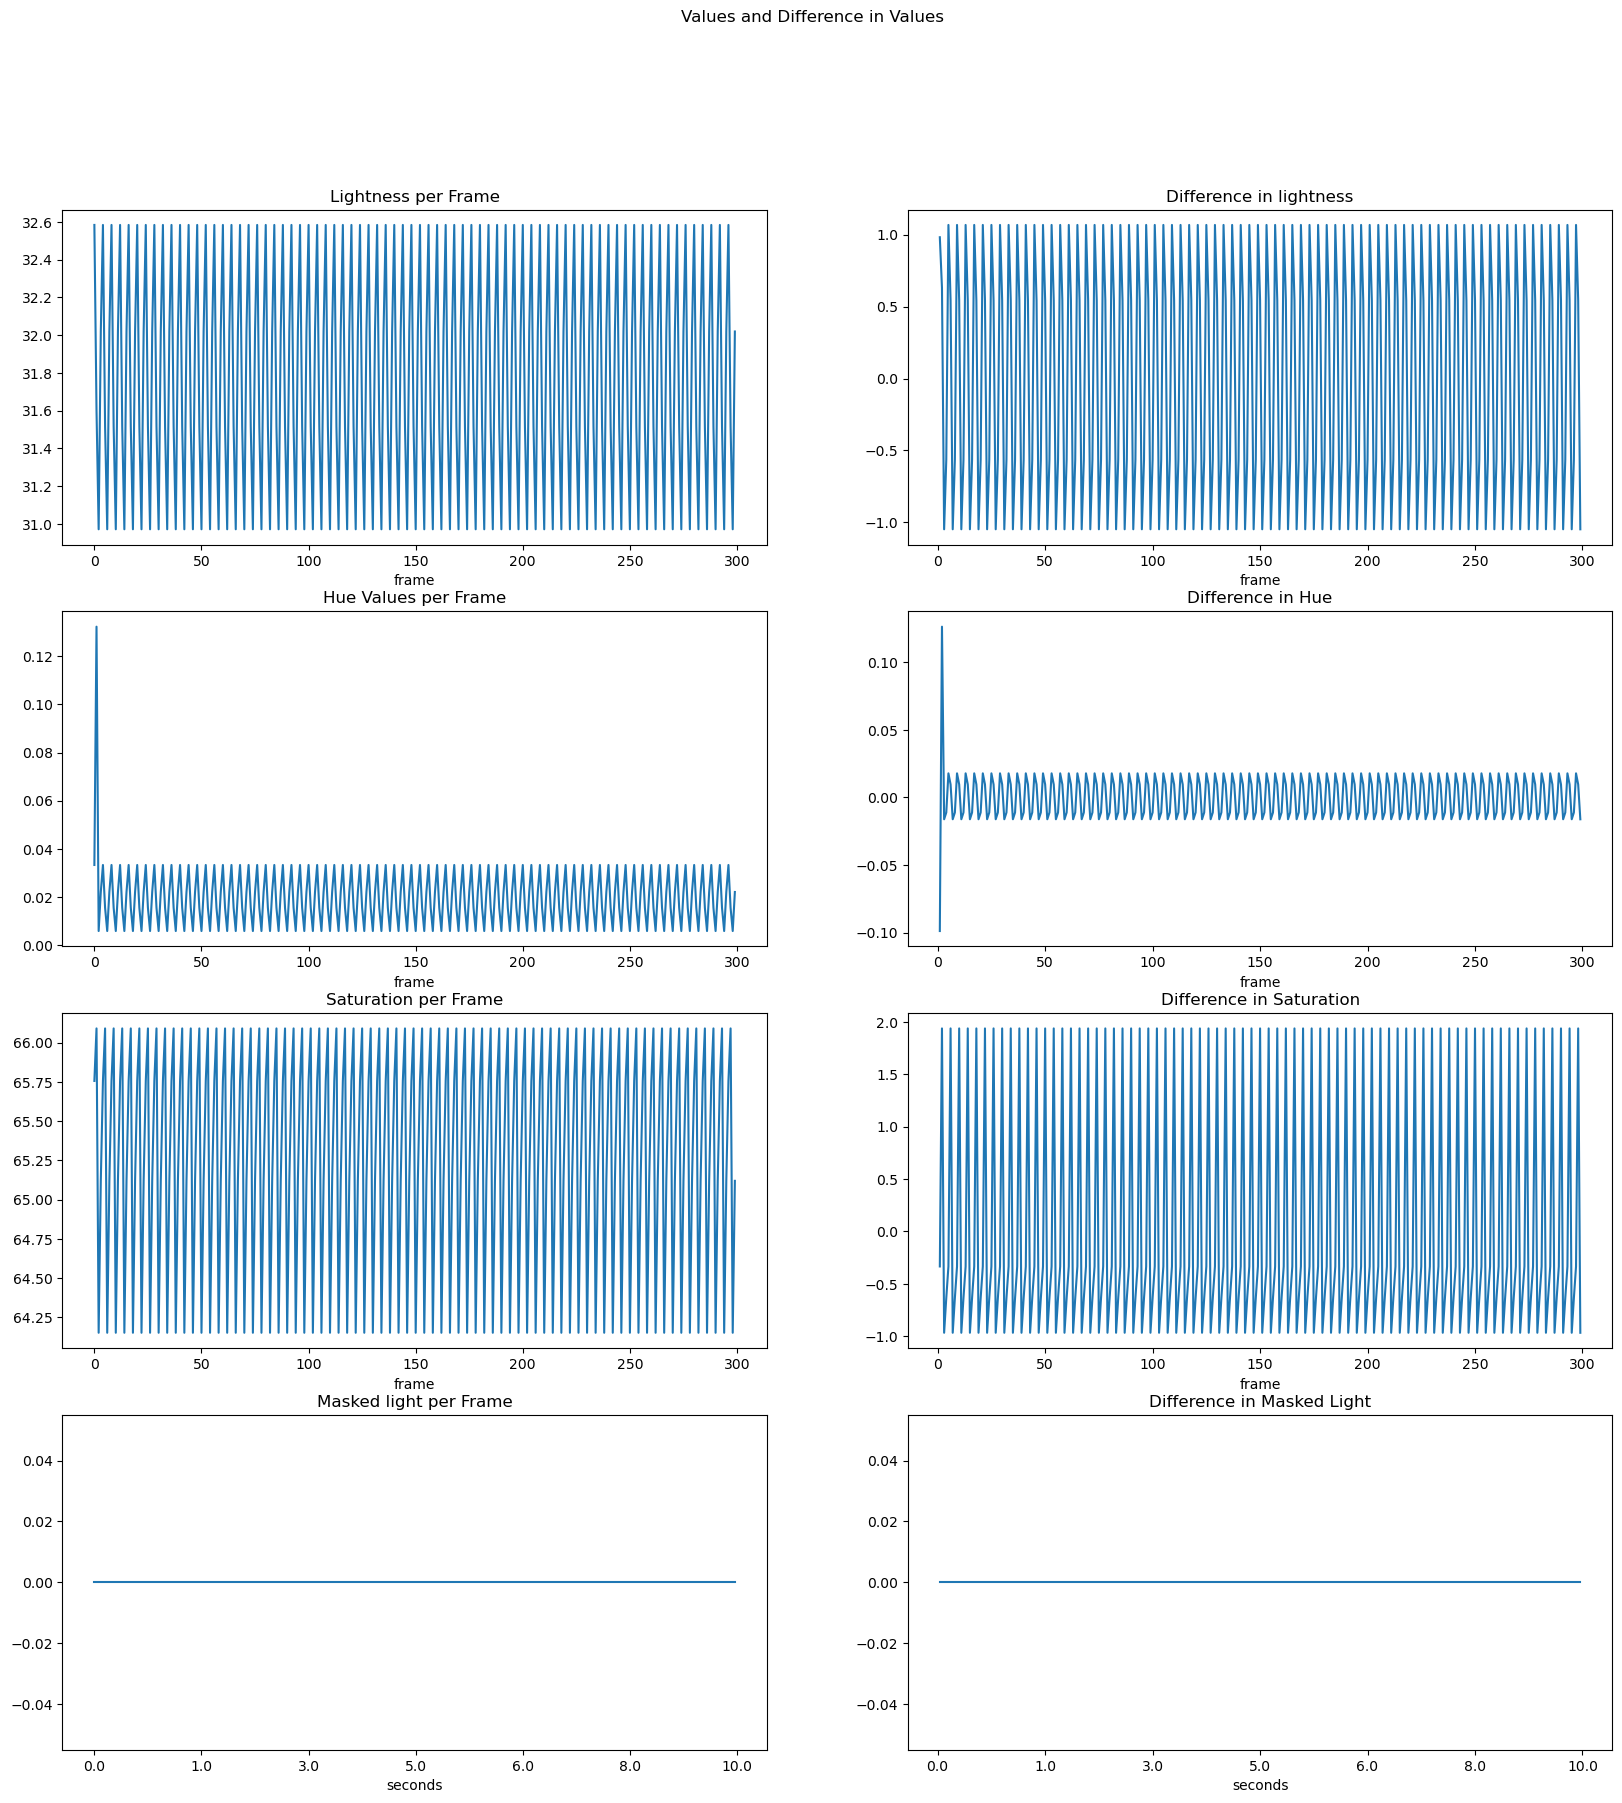

In [9]:
ex.frame_diff_changes(cdf)

In [10]:
reload(ex)

<module 'exploration' from '/Users/nadina/Documents/codeup/epilator/exploration.py'>

In [11]:
ff = ex.fourier_features(agg_df.lightness)

In [12]:
ff.head()

,sin_30_1,cos_30_1,sin_30_2,cos_30_2,sin_30_3,cos_30_3,sin_30_4,cos_30_4
lightness,,,,,,,,
32.58,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
31.60,0.21,0.98,0.41,0.91,0.59,0.81,0.74,0.67
30.97,0.41,0.91,0.74,0.67,0.95,0.31,0.99,-0.10
32.02,0.59,0.81,0.95,0.31,0.95,-0.31,0.59,-0.81
32.58,0.74,0.67,0.99,-0.10,0.59,-0.81,-0.21,-0.98


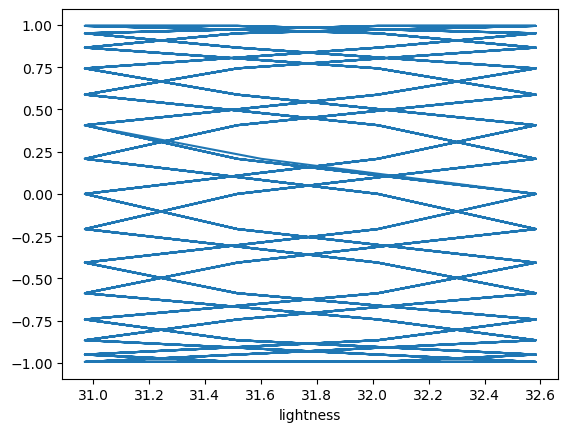

In [13]:
ff.sin_30_1.plot();

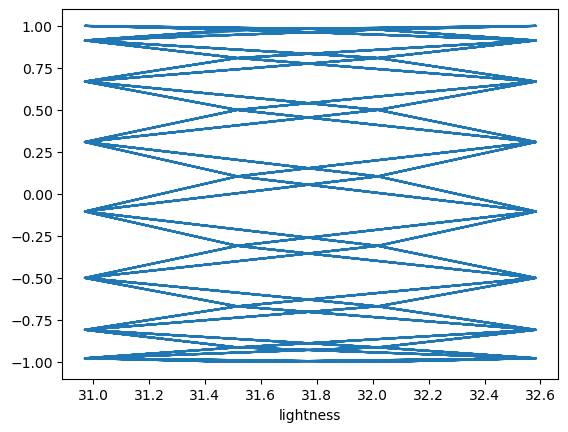

In [14]:
ff.cos_30_1.plot();

In [9]:
agg_df = ex.add_fourier_features(agg_df, 'lightness')

In [10]:
agg_df.head()

,lightness,hue,saturation,masked_values,light_diff,hue_diff,saturation_diff,mask_diff,lightness_sin_30_1,lightness_cos_30_1,lightness_sin_30_2,lightness_cos_30_2,lightness_sin_30_3,lightness_cos_30_3,lightness_sin_30_4,lightness_cos_30_4
frame,,,,,,,,,,,,,,,,
0,32.58,0.03,65.76,0,NaN,NaN,NaN,NaN,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
1,31.60,0.13,66.09,0,0.98,-0.10,-0.33,0.00,0.21,0.98,0.41,0.91,0.59,0.81,0.74,0.67
2,30.97,0.01,64.15,0,0.63,0.13,1.94,0.00,0.41,0.91,0.74,0.67,0.95,0.31,0.99,-0.10
3,32.02,0.02,65.12,0,-1.05,-0.02,-0.97,0.00,0.59,0.81,0.95,0.31,0.95,-0.31,0.59,-0.81
4,32.58,0.03,65.76,0,-0.56,-0.01,-0.64,0.00,0.74,0.67,0.99,-0.10,0.59,-0.81,-0.21,-0.98


In [18]:
agg_df = agg_df.assign(
    lightness_s = agg_df.lightness_sin_30_1+agg_df.lightness_sin_30_2+agg_df.lightness_sin_30_3+agg_df.lightness_sin_30_4,
    lightness_c = lambda x: x.lightness_cos_30_1 + x.lightness_cos_30_2 + x.lightness_cos_30_3 + x.lightness_cos_30_4,
    lightness_cs =  lambda x: x.lightness_s + x.lightness_c
)

In [19]:
agg_df.head(3)

,lightness,hue,saturation,masked_values,light_diff,hue_diff,saturation_diff,mask_diff,lightness_sin_30_1,lightness_cos_30_1,lightness_sin_30_2,lightness_cos_30_2,lightness_sin_30_3,lightness_cos_30_3,lightness_sin_30_4,lightness_cos_30_4,lightness_s,lightness_c,lightness_cs
frame,,,,,,,,,,,,,,,,,,,
0,32.58,0.03,65.76,0,NaN,NaN,NaN,NaN,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,4.00,4.00
1,31.60,0.13,66.09,0,0.98,-0.10,-0.33,0.00,0.21,0.98,0.41,0.91,0.59,0.81,0.74,0.67,1.95,3.37,5.32
2,30.97,0.01,64.15,0,0.63,0.13,1.94,0.00,0.41,0.91,0.74,0.67,0.95,0.31,0.99,-0.10,3.10,1.79,4.88


<Axes: xlabel='frame'>

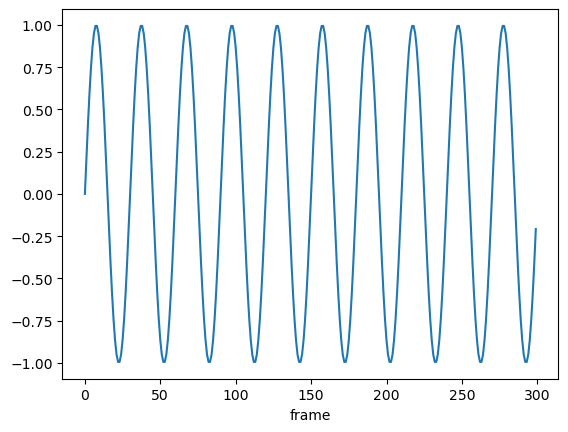

In [16]:
agg_df.lightness_sin_30_1.plot()

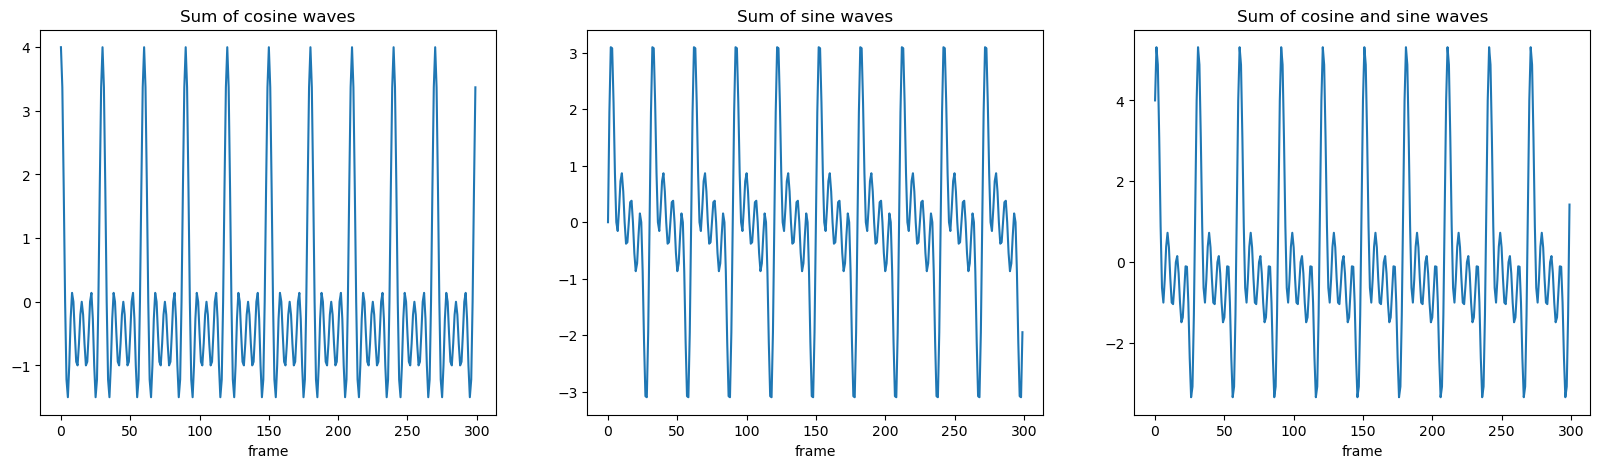

In [25]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
agg_df.lightness_c.plot()
plt.title('Sum of cosine waves')

plt.subplot(132)
agg_df.lightness_s.plot()
plt.title('Sum of sine waves')

plt.subplot(133)
agg_df.lightness_cs.plot()
plt.title('Sum of cosine and sine waves')
plt.show()